In [25]:
from IPython.core.display import HTML

def css_styling():
    styles = open("C:\Users\noname\Ipython Notebooks\custom_working.css", "r").read()
    return HTML(styles)
css_styling()

IOError: [Errno 22] invalid mode ('r') or filename: 'C:\\Users\noname\\Ipython Notebooks\\custom_working.css'

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Calculation of the time required for the SR-71 to Heat up  #

In this document we esitmate the time for an SR-71 to heat up just after take off.  As you may know the SR-71 has a hull that leaks on the runway. This is due precicley to the expansion of the materials from which the aircraft is designed.  We will use basic thermodynamic equations to figure our what sort of time we might expect for such a process.  First we have to define the libraries and variables that are to be used in this calculation.

In [1]:
import numpy as np
from __future__ import division
from sympy import *
# Variables for calculation

x, y, z, t ,R,R1,R2,V= symbols('x y z t R R1 R2 V')

# Define function Variables to be Used


# Varibles for Units

m, kg, sec, N , J , K, min= symbols('m kg sec N J K min')
# Varibies for iteration

k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

# Tell Sympy that we would like to see a nice ouput for our data


init_printing(use_unicode=True) 

Now we define the numbers that are specific to the problem.

In [2]:
d_wing = (100*10**-2)*m           # Depth of the wing.
k_TI = 23*J/(m*K*sec)             # coeficent of thermal conductivity.
Rho_TI = (2.7*10**3)*kg/(m**3)    # density of the metal.
Beta_TI = (8.6*10**-5)*1/K        # coeficent of thermal expansion.
c_TI = .91*1000*J/(kg*K)          # specific heat of the metal.
T_g = 237.15*(K)                  # Ground tempurature.
T_O = 588.7*(K)                   # Opterating tempurature.
V0 = 1.0*(m**3)                   # Inital Volume.
L = (140/.3048)*m                 # .3048 m/ft is a conversion factor.
W = (83/.3048)*m                  # .3048 m/ft is a conversion factor.
thick = (100*10**-2)*m            # Thickness of the wing (turns out to be d_wing.

Fist what is the change in the volume of the witn.  We can calculate this value by using the equation:  
 
$${\Delta}V = {B}_{TI}{\Delta}T{V_0}$$
  

In [3]:
Delta_wing = Beta_TI*(T_O-T_g)*V0;Delta_wing.evalf(3)

Now we can calculate the percent change in the size of the wing as:

In [4]:
(Delta_wing*100/V0).evalf(3)

The area of the aircraft or in this case just the wing can be found using the lenght and width provided as:

In [5]:
A_aircraft = L*W;A_aircraft.evalf(3)

The mass of the wing can be found as:

In [6]:
mass_wing = Rho_TI*A_aircraft*thick;mass_wing.evalf(3)

The energy input into the wing can be found using the simple equation: $$ {Q} = {m}{c}{\Delta}T $$

In [7]:
Q_in = mass_wing*c_TI*(T_O-T_g);Q_in.evalf(3)

Now lets use the heat conduction equation to get an idea of how much energy must enter the aircraft given a simple connection between the air and the wing surface.

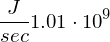

In [8]:
H_test = A_aircraft*k_TI*(T_O-T_g)/thick;H_test.evalf(3)

The time is then the input energy divided by the convection energy rate and can be calculated as $$ t = {Q_{in}}/{H_{test}} $$

In [9]:
Time = Q_in/H_test; Time.evalf(3)

Now lets convert to minuets from seconds so we can get a better idea of how long this is.

In [10]:
Time_min = (Time/(3600*sec/min));Time_min.evalf(3)

Now we round to the correct number of significant digits.

In [11]:
Time_min.evalf(2)

In [12]:
integrate(cos(x), x)